## Using pygal

In [ ]:
# https://www.geeksforgeeks.org/gauge-chart-in-pygal/
# https://www.geeksforgeeks.org/solid-gauge-chart-in-pygal/

Pygal is a Python module that is mainly used to build SVG (Scalar Vector Graphics) graphs and charts. SVG is a vector-based graphics in the XML format that can be edited in any editor. Pygal can create graphs with minimal lines of code that can be easy to understand and write.

In [ ]:
#!pip install pygal

In [ ]:
#!pip install cairosvg

In [ ]:
#!pip3 install cairocffi

In [ ]:
# Install GTK, to address this error --> no library called "cairo-2" was found

# https://github.com/tschoonj/GTK-for-Windows-Runtime-Environment-Installer/releases

### Solid Gauge

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

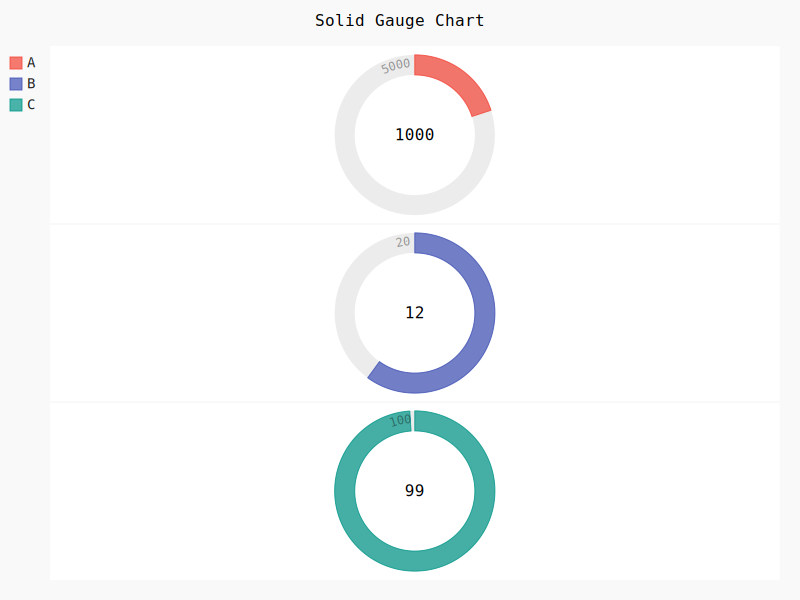

In [4]:
import pygal
  
# creating the chart object
Solid_Gauge = pygal.SolidGauge(inner_radius = 0.75)
  
# naming the title
Solid_Gauge.title = 'Solid Gauge Chart'     
  
# Random data
Solid_Gauge.add('A', [{'value': 1000, 'max_value': 5000}])
Solid_Gauge.add('B', [{'value': 12, 'max_value': 20}])
Solid_Gauge.add('C', [{'value': 99, 'max_value': 100}])

Solid_Gauge

### Half Pie

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

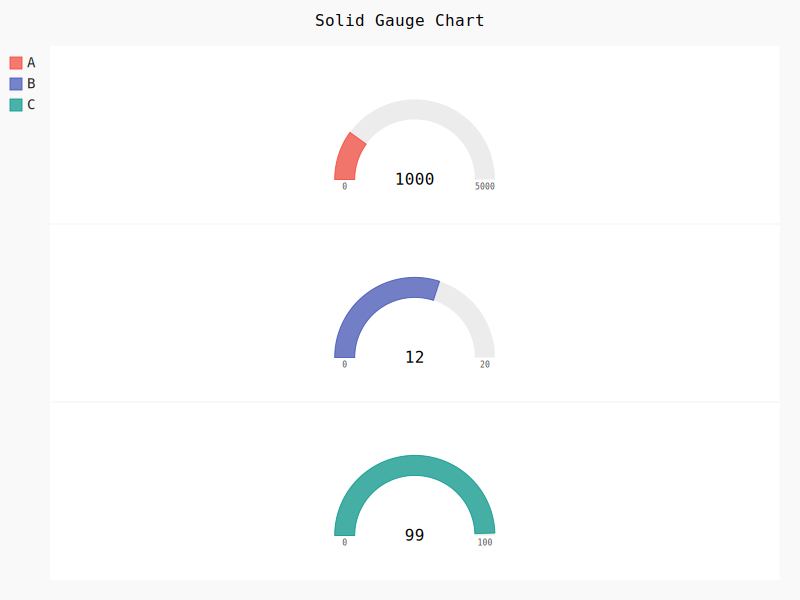

In [5]:
import pygal
  
# creating the chart object
Solid_Gauge = pygal.SolidGauge(inner_radius = 0.75, 
                               half_pie = True)
  
# naming the title
Solid_Gauge.title = 'Solid Gauge Chart'     
  
# Random data
Solid_Gauge.add('A', [{'value': 1000, 'max_value': 5000}])
Solid_Gauge.add('B', [{'value': 12, 'max_value': 20}])
Solid_Gauge.add('C', [{'value': 99, 'max_value': 100}])
  
Solid_Gauge

## Using Plotly

In [ ]:
# https://plotly.com/python/gauge-charts/
# https://observablehq.com/@arronhunt/building-a-gauge-meter-with-plotly
# https://stackoverflow.com/questions/64994341/gauge-needle-for-plotly-indicator-graph

### Basic Gauge

In [15]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 270,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Speed"}))

fig.show()

### Add Steps, Threshold, and Delta

In [2]:
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 450,
    mode = "gauge+number+delta",
    title = {'text': "Speed"},
    delta = {'reference': 380},
    gauge = {'axis': {'range': [None, 500]},
             'steps' : [
                 {'range': [0, 250], 'color': "lightgray"},
                 {'range': [250, 400], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 490}}))

fig.show()

### Building a gauge and needle chart with Plotly

In [5]:
import plotly.graph_objects as go

maxValue = 42
currentValue = 27

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = currentValue,
    number = {'suffix': "- PE", 'font': {'size': 30}},
    domain = {'x': [0,1], 'y': [0,1]},
    gauge = {
        'axis': {'range': [None, maxValue], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "black"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 12], 'color': 'darkgreen'},
            {'range': [12, 15], 'color': 'green'},
            {'range': [15, 20], 'color': 'yellow'},
            {'range': [20, 25], 'color': 'orange'},
            {'range': [25,maxValue], 'color': 'red'}],
        }))

fig.show()

## Using Matplotlib

In [19]:
# https://waterprogramming.wordpress.com/2018/06/04/creating-shaded-dial-plots-in-python/
# http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/

### Creating shaded dial plots

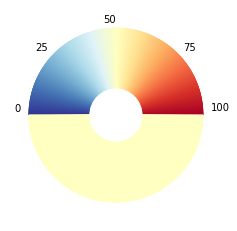

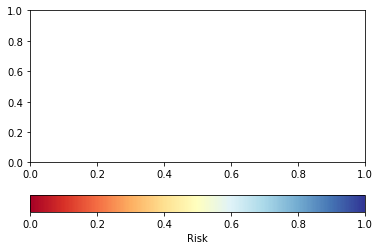

In [20]:
import matplotlib.pyplot as plt
from matplotlib import cm, gridspec
import numpy as np
import math
from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
# set your color array and name of figure here:
dial_colors = np.linspace(0,1,1000) # using linspace here as an example
figname = 'myDial'
 
# specify which index you want your arrow to point to
arrow_index = 750
 
# create labels at desired locations
# note that the pie plot ploots from right to left
labels = [' ']*len(dial_colors)*2
labels[25] = '100'
labels[250] = '75'
labels[500] = '50'
labels[750] = '25'
labels[975] = '0'
 
# function plotting a colored dial
def dial(color_array, arrow_index, labels, ax):
    # Create bins to plot (equally sized)
    size_of_groups=np.ones(len(color_array)*2)
 
    # Create a pieplot, half white, half colored by your color array
    white_half = np.ones(len(color_array))*.5
    color_half = color_array
    color_pallet = np.concatenate([color_half, white_half])
 
    cs=cm.RdYlBu(color_pallet)
    pie_wedge_collection = ax.pie(size_of_groups, colors=cs, labels=labels)
 
    i=0
    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor(cm.RdYlBu(color_pallet[i]))
        i=i+1
 
    # create a white circle to make the pie chart a dial
    my_circle=plt.Circle( (0,0), 0.3, color='white')
    ax.add_artist(my_circle)
 
    # create the arrow, pointing at specified index
    arrow_angle = (arrow_index/float(len(color_array)))*3.14159
    arrow_x = 0.2*math.cos(arrow_angle)
    arrow_y = 0.2*math.sin(arrow_angle)
    ax.arrow(0,0,-arrow_x,arrow_y, width=.02, head_width=.05, \
        head_length=.1, fc='k', ec='k')
 
# create figure and specify figure name
fig, ax = plt.subplots()
 
# make dial plot and save figure
dial(dial_colors, arrow_index, labels, ax)
ax.set_aspect('equal')
plt.savefig(figname + '.png', bbox_inches='tight') 
 
# create a figure for the colorbar (crop so only colorbar is saved)
fig, ax2 = plt.subplots()
cmap = cm.ScalarMappable(cmap='RdYlBu')
cmap.set_array([min(dial_colors), max(dial_colors)])
cbar = plt.colorbar(cmap, orientation='horizontal')
cbar.ax.set_xlabel("Risk")
plt.savefig('cbar.png', bbox_inches='tight')
cbar = Image.open('cbar.png')
c_width, c_height = cbar.size
cbar = cbar.crop((0, .8*c_height, c_width, c_height)).save('cbar.png')
 
# open figure and crop bottom half
im = Image.open(figname + '.png')
width, height = im.size
 
# crop bottom half of figure
# function takes top corner &lt;span                data-mce-type="bookmark"                id="mce_SELREST_start"              data-mce-style="overflow:hidden;line-height:0"              style="overflow:hidden;line-height:0"           &gt;&amp;#65279;&lt;/span&gt;and bottom corner coordinates
# of image to keep, (0,0) in python images is the top left corner
im = im.crop((0, 0, width+c_width, int(height/2.0))).save(figname + '.png')